In [1]:
#!/usr/bin/env pyhton3
# -*- coding 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
import warnings
warnings.filterwarnings('ignore')

## One hidden layer

In [109]:
# Global variables
RANDOM_STATE = 24
np.random.RandomState(seed = RANDOM_STATE)
N_SAMPLE = 1000
TEST_SIZE = 0.2
ALPHA = 0.01 # learning rate
NOISE = 0.2 # Error
EPOCHS = 4000

In [5]:
inpDir = './input'
outDir = './output'

In [6]:
params = {
    'legend.fontsize': 'medium',
    'figure.figsize':(15,4),
    'axes.labelsize':'medium',
    'axes.titlesize':'medium',
    'xtick.labelsize': 'medium',
    'ytick.labelsize':'medium',
    #'text.usetex':True,
}
plt.rcParams.update(params)
CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')


## Load Data
Sklearn make_moons

In [8]:
X,y = datasets.make_moons(
        n_samples = N_SAMPLE,
        noise = NOISE,
        shuffle  = True,
        random_state = RANDOM_STATE
)
X.shape, y.shape

((1000, 2), (1000,))

EDA 
1: plot data

<Axes: xlabel='A', ylabel='B'>

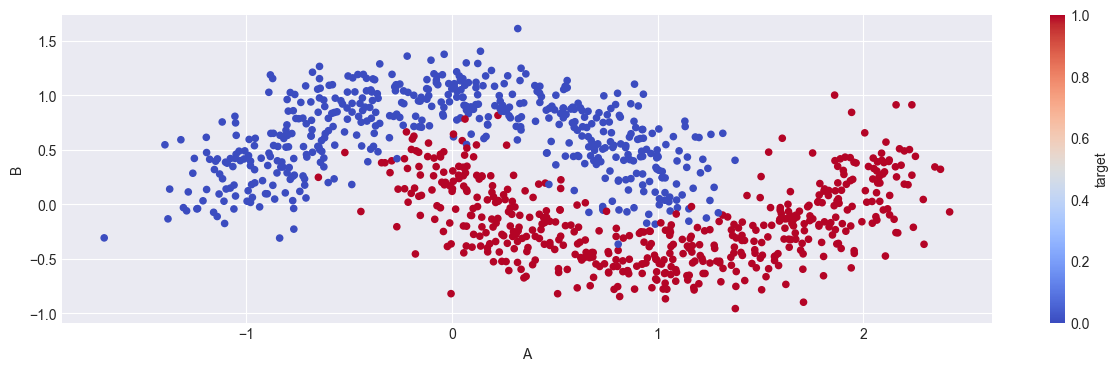

In [10]:

data_df = pd.DataFrame(X, columns = ('A','B'))
data_df['target'] = y
data_df.head()

data_df.plot.scatter('A','B',c= 'target', cmap=CMAP)

In [11]:
def predict(row, wgts):
    z = wgts[0] # b/ w0
    for i in range(len(row) - 1):# w1x1 + w2x2...+b 
        z += wgts[i+1] * row[i]
    return 1 if z>= 0 else 0 # stepwise Activation Function
        

In [12]:
# unit testing
weights = np.array([0.1,2.0, 1.0])
predict(data_df.loc[0].values, weights)


1

In [13]:
# data_df = pd.read_csv(os.path.join(inpDir,'breast_cancer_mod.csv'))
# data_df.head()

EDA
1: Plot the Data
2: print min.max, average 

In [15]:
data_df = pd.DataFrame(X, columns = ('A','B'))
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [16]:
features_df = data_df.drop('target', axis=1)
labels = data_df['target']

In [17]:
data_train , data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]
display(data_train.shape)
type(data_train)

(900, 3)

numpy.ndarray

In [18]:
#rng = np.random.default_rng(seed=RANDOM_STATE) # random no. generator
# weights = rng.random(data_train.shape[1])
# weights

In [19]:
# weights = rng.random(data_train.shape[1])
# weights

In [20]:
np.random.default_rng?


Docstring:
default_rng(seed=None)
Construct a new Generator with the default BitGenerator (PCG64).

    Parameters
    ----------
    seed : {None, int, array_like[ints], SeedSequence, BitGenerator, Generator}, optional
        A seed to initialize the `BitGenerator`. If None, then fresh,
        unpredictable entropy will be pulled from the OS. If an ``int`` or
        ``array_like[ints]`` is passed, then it will be passed to
        `SeedSequence` to derive the initial `BitGenerator` state. One may also
        pass in a `SeedSequence` instance.
        Additionally, when passed a `BitGenerator`, it will be wrapped by
        `Generator`. If passed a `Generator`, it will be returned unaltered.

    Returns
    -------
    Generator
        The initialized generator object.

    Notes
    -----
    If ``seed`` is not a `BitGenerator` or a `Generator`, a new `BitGenerator`
    is instantiated. This function does not manage a default global instance.

    See :ref:`seeding_and_entropy` 

In [21]:
rng = np.random.default_rng(seed=RANDOM_STATE)
def train_weights(train, alpha, n_epoch):
    errors = []
    weights = rng.random(data_train.shape[1]) # randomly generated weights
    m= train.shape[0] # number of samples
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            dz = prediction - row[-1] # a-y
            sum_error += (prediction - row[-1]) ** 2 # sum of squared error
            weights[0] +=  - alpha * dz / m # calculating and adjusting weights by alpha multiplication and  divide with whole row no. to get error for whole set
            for i in range(len(row) - 1):
                weights[i+1] += -alpha * row[i] * dz / m
        errors.append(sum_error / m)
    return errors, weights

In [22]:
errors,weights = train_weights(data_train,ALPHA, EPOCHS)

In [23]:
weights, len(errors)

(array([ 2.17000261e-06,  1.87673909e-05, -5.34023085e-05]), 20000)

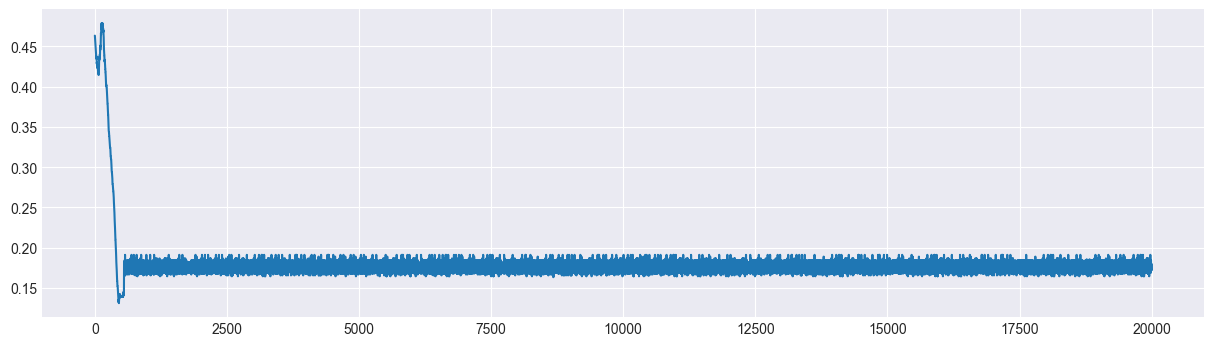

In [24]:
fig, ax = plt.subplots()
ax.plot(errors)

In [25]:
def fn_plot_decision_boundary(wts,X):
    fig, ax = plt.subplots(figsize =(8,5))
    dm = 0.01
    # Min and Max Along Two Axis 
    x_min, x_max = X[:,0].min(), X[:,0].max()
    y_min, y_max = X[:,1].min(), X[:,1].max()

    ## generate a mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm), 
                    np.arange(y_min, y_max, dm))
    
    # ravel means 2d -> 1d
    
    XX = np.c_[xx.ravel(), yy.ravel()]
    
    #dummy column 
    
    XX = np.hstack((XX, np.ones((XX.shape[0], 1))))
    y_pred = []
    for row in XX:
        y_p = predict(row, wts)
        y_pred.append(y_p)
    Z = np.array(y_pred).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha = 0.8 , cmap = plt.cm.Paired)
    ax.scatter(X[:,0], X[:,1], c = X[:,2], edgecolors = 'k', cmap=CMAP)


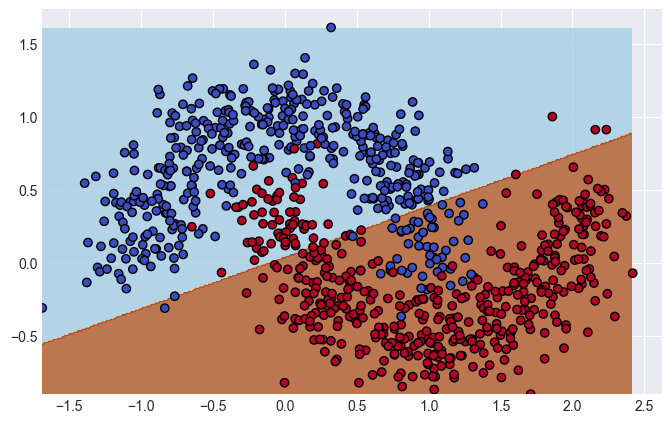

In [26]:
fn_plot_decision_boundary(weights, data_train)

In [27]:
matplotlib.__version__

'3.9.2'

## Sigmoid Activation Function

In [29]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [30]:
  def predict(model, X_p):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    ## forward propagation
    # layer 1
    z1 = X_p.dot(W1) + b1 # aggregate of bias, weights and inputs
    a1 = fn_actv(z1) # activation function
    # layer 2
    z2 = a1.dot(W2) + b2 # aggregate of bias, weights and inputs
    a2 = sigmoid(z2) # activation function
    return a2 >= 0.5
    

In [31]:
def fn_calculate_loss(model, X_l, y_l):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    m = X_l.shape[0]
    ## FORWARD propagation
    # Layer 1
    z1 = X_l.dot(W1) + b1 # Aggregation 
    a1 = fn_actv(z1) # Activation
    # LAyer 2
    z2 = a1.dot(W2) + b2 # Aggregation
    a2 = sigmoid(z2) # Activation
    data_loss = - y_l * np.log(a2)
    return data_loss.sum() / m

In [32]:
def fn_actv(z):
    return np.tanh(z)

def fn_actv_prime(z):
    return 1 - (np.tanh(z))**2

In [33]:
fn_actv(np.array([[-1,0,1],[-np.inf,0,np.inf]]))

array([[-0.76159416,  0.        ,  0.76159416],
       [-1.        ,  0.        ,  1.        ]])

In [34]:
# def predict():
#     z = 1
#     return sigmoid(z) # stepwise Activation Function
        

In [35]:
def fn_loss_calculate_loss():
    pass

## Split DATA in Test Train

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE,stratify = y, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [38]:
def build_model(nn_hdim, X_t, y_t, n_epochs= EPOCHS, alpha = ALPHA):
    '''
    2-4-1
    '''
    # get dimensions for weights init
    m, nn_input_dim = X_t.shape
    nn_output_shape = y_t.shape[1]
    # initialize weights
    W1 = rng.random((nn_input_dim, nn_hdim), dtype = np.float32) / np.sqrt(nn_input_dim)
    W2 = rng.random((nn_hdim, nn_output_shape), dtype = np.float32)/np.sqrt(nn_hdim)

    b1 = np.zeros((1,nn_hdim), dtype = np.float32)
    b2 = np.zeros((1,nn_output_shape), dtype = np.float32)
    
    curr_loss = 0
    loss = []
    # loss_hist = {}
    epoch = []
    for i in range(n_epochs):
        ### Forwards propagation
        # Layer1 
        z1 = X_t.dot(W1) + b1 # Aggregation function
        a1 = fn_actv(z1) ## Activation function

    # Layer2
        z2 = a1.dot(W2) + b2 # Aggregation function
        a2 = sigmoid(z2)# Activation function

        ### Back Propagation
        ## Layer 2
        dz2 = a2 - y_t # y should be of shape (1,m)
        
        dW2 = (a1.T).dot(dz2)
        assert(W2.shape == dW2.shape), 'Shape: W2- {W2.shape} and dW2-{dW2.shape}'
        db2 = np.sum(dz2, axis = 0, keepdims =True)
        assert(b2.shape == db2.shape), 'Shape: b2- {b2.shape} and db2-{db2.shape}'
        
        da1 = dz2.dot(W2.T)    
        assert(a1.shape == da1.shape), 'Shape: a1-{a1.shape} and da1-{da1.shape}'
        #layer 1

        dz1 = da1 *fn_actv_prime(z1)
        assert(z1.shape == dz1.shape),'Shape: z1-{z1.shape} and dz1-{dz1.shape}'
        dW1 = (X_t.T).dot(dz1)
        assert(W1.shape == dW1.shape), 'Shape: W1-{W1.shape} and dW1-{dW1.shape}'
        db1 = np.sum(dz1, axis = 0, keepdims = True)
        assert(b1.shape == db1.shape), 'Shape: b1-{b1.shape} and db1-{db1.shape}'
        

        ## Gradient Update
        W1 += -alpha *dW1 /m
        W2 += -alpha *dW2 /m
        b1 += -alpha *db1 /m
        b2 += -alpha *db2 /m

        model = {'W1': W1, 'b1':b1, 'W2':W2, 'b2':b2}
        
        if i%100==0:
            curr_loss = fn_calculate_loss(model, X_t, y_t)
            loss.append(curr_loss)
            epoch.append(i)
            
        if i%1000 == 0:
           print(f'Loss after {i:>5d} epochs : {curr_loss:0.5f}')
            
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss
    # printing the error reduction curve
    fig, ax = plt.subplots()
    ax.plot(loss)
    return model
    

In [39]:
y_train = y_train.reshape(-1,1)
y_train.shape

(800, 1)

In [40]:
loss_hist = {}
loss_hist

{}

Loss after     0 epochs : 0.30852
Loss after  1000 epochs : 0.25013
Loss after  2000 epochs : 0.18022
Loss after  3000 epochs : 0.15821
Loss after  4000 epochs : 0.15168
Loss after  5000 epochs : 0.14974
Loss after  6000 epochs : 0.14901
Loss after  7000 epochs : 0.14860
Loss after  8000 epochs : 0.14826
Loss after  9000 epochs : 0.14789
Loss after 10000 epochs : 0.14739
Loss after 11000 epochs : 0.14664
Loss after 12000 epochs : 0.14546
Loss after 13000 epochs : 0.14360
Loss after 14000 epochs : 0.14081
Loss after 15000 epochs : 0.13693
Loss after 16000 epochs : 0.13206
Loss after 17000 epochs : 0.12655
Loss after 18000 epochs : 0.12081
Loss after 19000 epochs : 0.11519


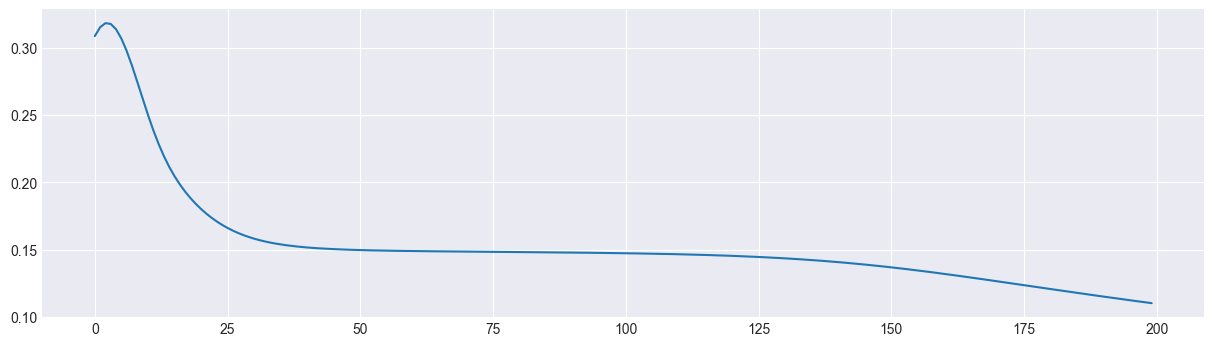

In [41]:
model = build_model(4,X_train,y_train )

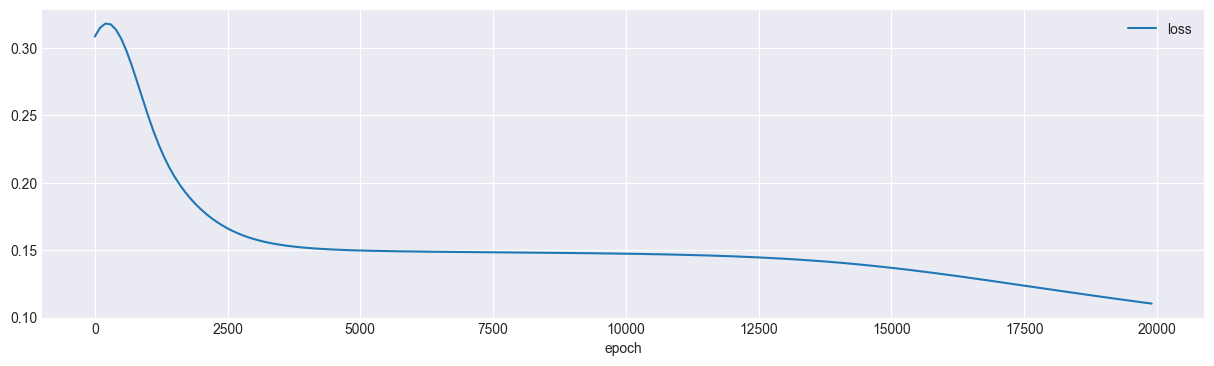

In [42]:
pd.DataFrame(loss_hist).plot(x='epoch', y='loss');

In [43]:
y_pred = predict(model, X_train)
accuracy_score(y_true = y_train, y_pred = y_pred)


0.9075

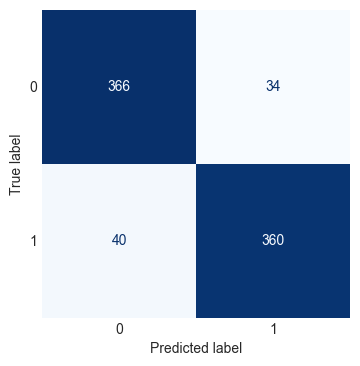

In [44]:
cm = confusion_matrix(y_true=y_train, y_pred= y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
fig,ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
ax.grid(False)

In [45]:
y_pred = predict(model, X_test)
accuracy_score(y_true = y_test, y_pred = y_pred)


0.915

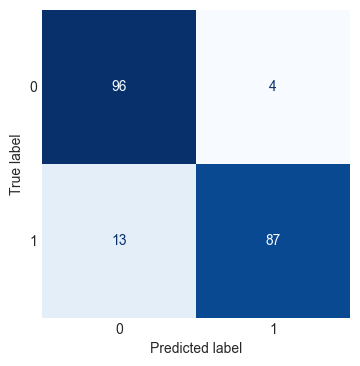

In [46]:
cm = confusion_matrix(y_true=y_test, y_pred= y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
fig,ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
ax.grid(False)

In [47]:
def fn_plot_decision_boundary(model, X_tr, y_tr, X_ts, y_ts):
    fig, ax = plt.subplots(figsize =(8,5))
    dm = 0.05
    # Min and Max Along Two Axis 
    x_min, x_max = X_tr[:,0].min(), X_tr[:,0].max()
    y_min, y_max = X_tr[:,1].min(), X_tr[:,1].max()

    ## generate a mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm), 
                    np.arange(y_min, y_max, dm))
    
    # ravel means 2d -> 1d
    
    XX = np.c_[xx.ravel(), yy.ravel()]
    
    
    y_pred = predict(model,XX)
    
    Z = np.array(y_pred).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha = 0.8 , cmap = plt.cm.Paired)
    ax.scatter(X_tr[:,0], X_tr[:,1], c = y_tr, edgecolors = 'k', cmap=CMAP)
    ax.scatter(X_ts[:,0], X_ts[:,1], c = y_ts, edgecolors = 'k', cmap=CMAP, marker ='*')


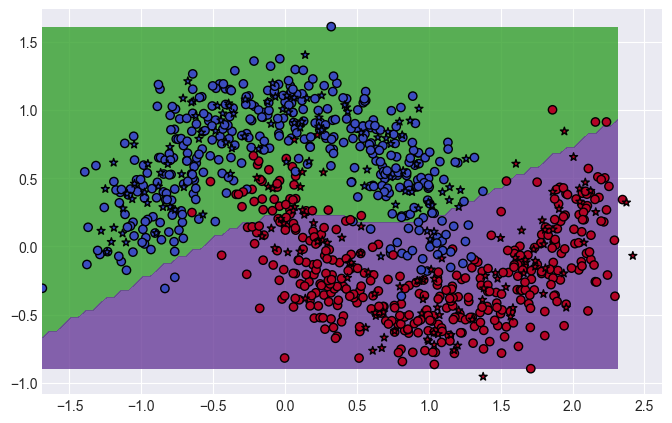

In [48]:
fn_plot_decision_boundary(model, X_train, y_train, X_test, y_test)

In [49]:
##For hidden layer 50 learning Rate= 0.001

Loss after     0 epochs : 0.20336
Loss after  1000 epochs : 0.17093
Loss after  2000 epochs : 0.15281
Loss after  3000 epochs : 0.14826
Loss after  4000 epochs : 0.14630
Loss after  5000 epochs : 0.14488
Loss after  6000 epochs : 0.14347
Loss after  7000 epochs : 0.14179
Loss after  8000 epochs : 0.13961
Loss after  9000 epochs : 0.13667
Loss after 10000 epochs : 0.13272
Loss after 11000 epochs : 0.12766
Loss after 12000 epochs : 0.12158
Loss after 13000 epochs : 0.11484
Loss after 14000 epochs : 0.10790
Loss after 15000 epochs : 0.10116
Loss after 16000 epochs : 0.09491
Loss after 17000 epochs : 0.08926
Loss after 18000 epochs : 0.08424
Loss after 19000 epochs : 0.07982


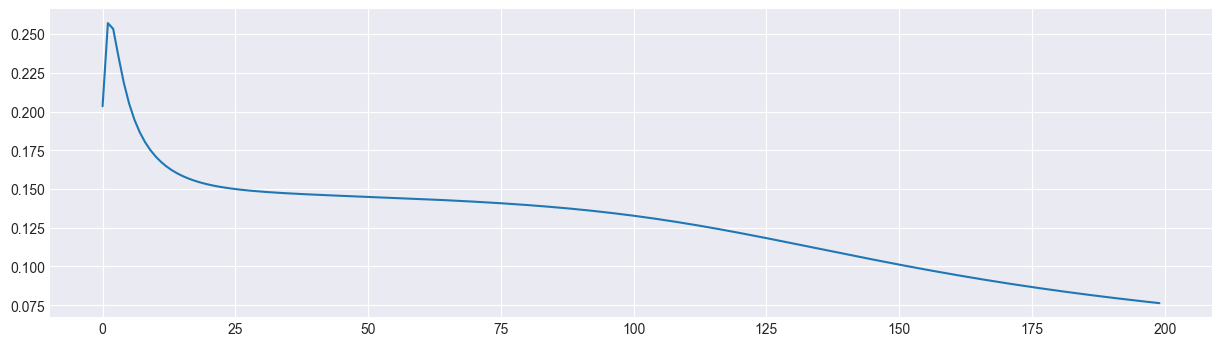

In [50]:
model = build_model(50,X_train,y_train )

In [51]:
y_pred = predict(model, X_train)
accuracy_score(y_true = y_train, y_pred = y_pred)


0.9325

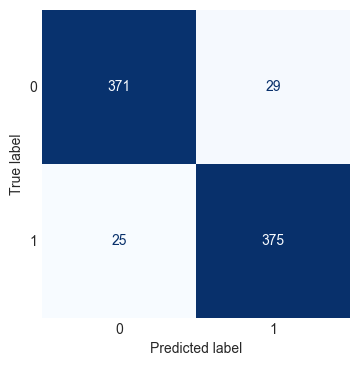

In [52]:
cm = confusion_matrix(y_true=y_train, y_pred= y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
fig,ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
ax.grid(False)

In [53]:
y_pred = predict(model, X_test)
accuracy_score(y_true = y_test, y_pred = y_pred)


0.945

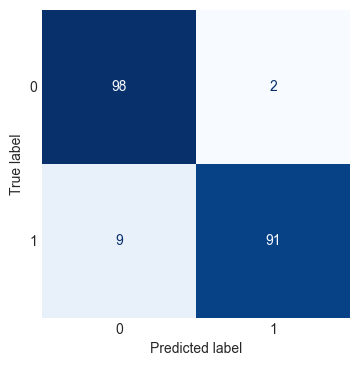

In [54]:
cm = confusion_matrix(y_true=y_test, y_pred= y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
fig,ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
ax.grid(False)

In [55]:
def fn_plot_decision_boundary(model, X_tr, y_tr, X_ts, y_ts):
    fig, ax = plt.subplots(figsize =(8,5))
    dm = 0.05
    # Min and Max Along Two Axis 
    x_min, x_max = X_tr[:,0].min(), X_tr[:,0].max()
    y_min, y_max = X_tr[:,1].min(), X_tr[:,1].max()

    ## generate a mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm), 
                    np.arange(y_min, y_max, dm))
    
    # ravel means 2d -> 1d
    
    XX = np.c_[xx.ravel(), yy.ravel()]
    
    
    y_pred = predict(model,XX)
    
    Z = np.array(y_pred).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha = 0.8 , cmap = plt.cm.Paired)
    ax.scatter(X_tr[:,0], X_tr[:,1], c = y_tr, edgecolors = 'k', cmap=CMAP)
    ax.scatter(X_ts[:,0], X_ts[:,1], c = y_ts, edgecolors = 'k', cmap=CMAP, marker ='*')


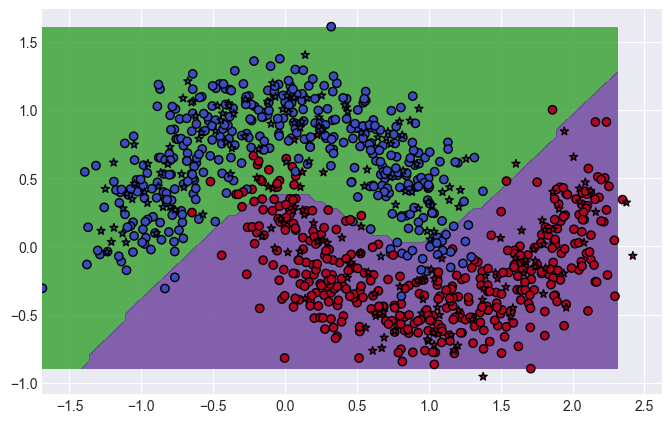

In [56]:
fn_plot_decision_boundary(model, X_train, y_train, X_test, y_test)
